In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python:{}'.format(sys.version))
print('Pandas:{}'.format(pandas.__version__))
print('Numpy:{}'.format(numpy.__version__))
print('Matplotlib:{}'.format(matplotlib.__version__))
print('Seaborn:{}'.format(seaborn.__version__))
print('Scipy:{}'.format(scipy.__version__))
print('Sklearn:{}'.format(sklearn.__version__))

Python:3.6.8 (v3.6.8:3c6b436a57, Dec 24 2018, 02:04:31) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas:0.19.2
Numpy:1.16.4
Matplotlib:3.3.1
Seaborn:0.10.1
Scipy:1.4.1
Sklearn:0.23.2


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
print(data.shape)

(284807, 31)


In [6]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [7]:
data=data.sample(frac=0.1,random_state=1)
print(data.shape)

(28481, 31)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/tools/plotting.py:3484: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/tools/plotting.py:3484: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/tools/plotting.py:3490: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.co

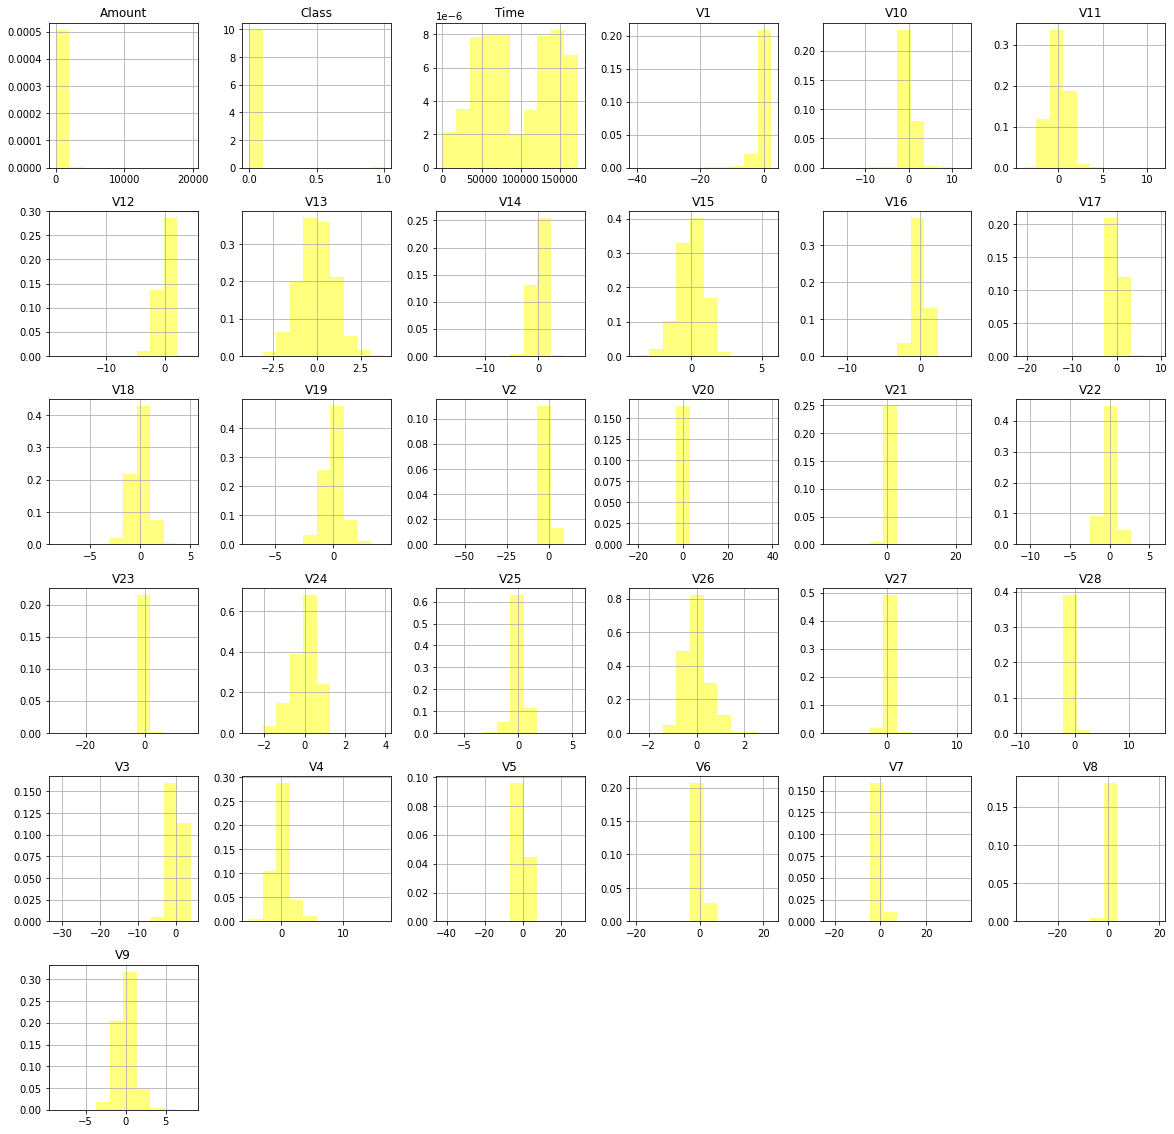

In [8]:
#plot histogram of each parameter
data.hist(figsize=(20,20),
         facecolor='yellow',
       density=True,
       alpha=0.5)
plt.show()

In [9]:
#determine number of Fraud cases in dataset
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
outlier_fraction=len(fraud)/float(len(valid))
print(outlier_fraction)

0.0017234102419808666


In [10]:
print('Fraud Cases:{}'.format(len(fraud)))
print('Valid Cases:{}'.format(len(valid)))

Fraud Cases:49
Valid Cases:28432


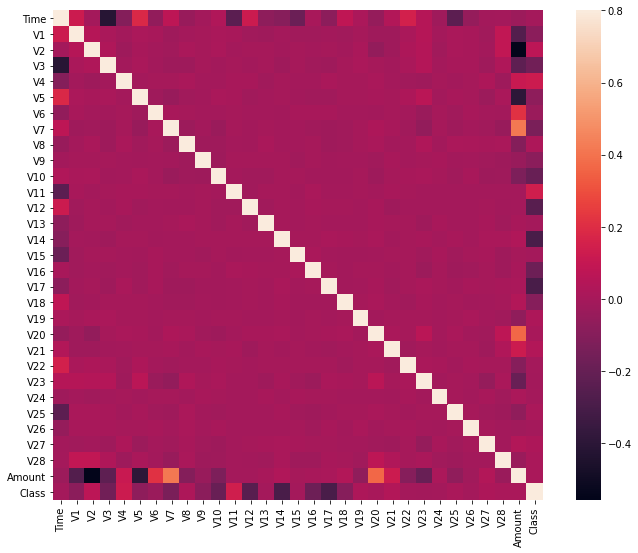

In [11]:
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [12]:
# Get all the column from the Dataframe 
columns= data.columns.tolist()
#filters the columns to remove data we dont want 
columns = [c for c in columns if c not in['Class']]
#Store the variables we'll be predicting on
targets='Class'
X=data[columns]
Y=data[targets]
#print the Shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


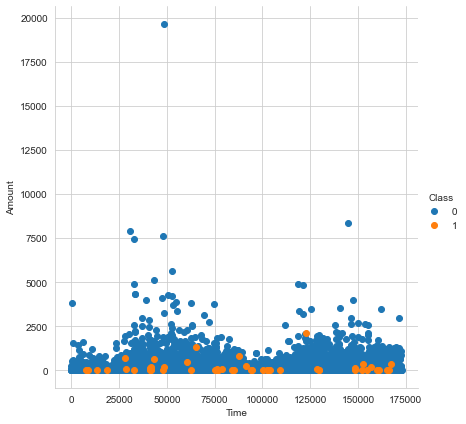

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

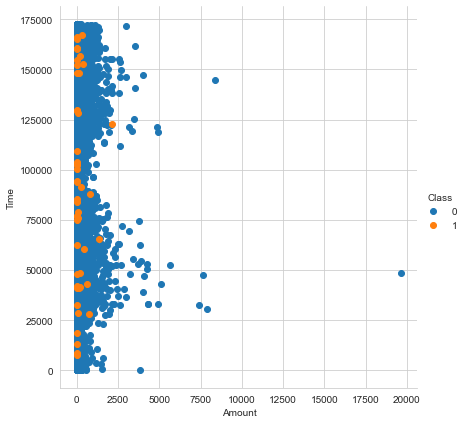

In [14]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

In [15]:
FilteredData = data[['Time','Amount', 'Class']]
FilteredData

,Time,Amount,Class
169876,119907.0,1.79,0
127467,78340.0,1.98,0
137900,82382.0,0.89,0
21513,31717.0,15.98,0
134700,80923.0,0.76,0
196117,131364.0,69.90,0
24533,33274.0,6.55,0
13629,24158.0,1.00,0
246673,153276.0,84.15,0
91842,63649.0,17.24,0


In [16]:
print(FilteredData.shape)

(28481, 3)


In [17]:
FilteredData["Class"].value_counts()

0    28432
1       49
Name: Class, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


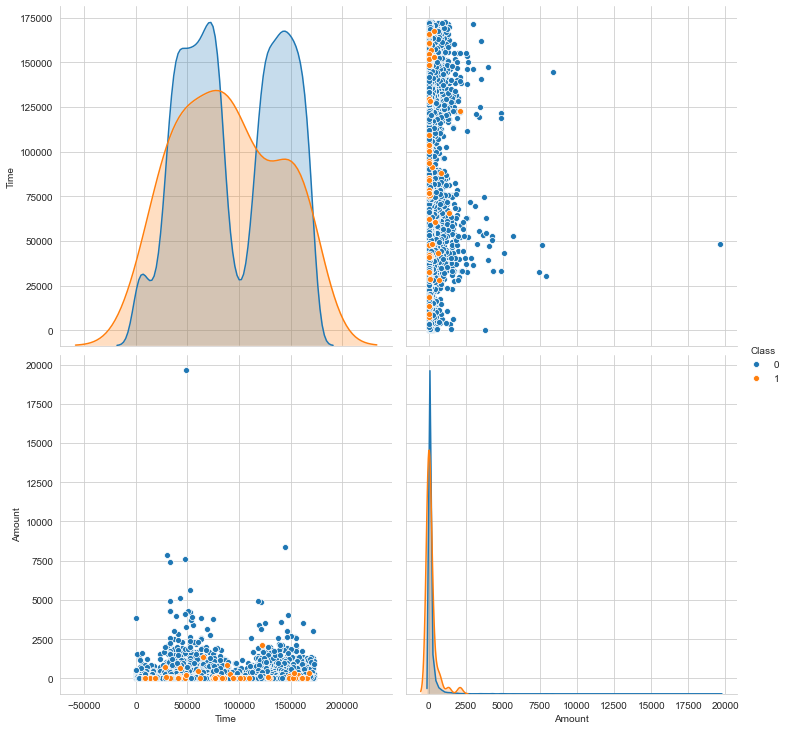

In [18]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", size=5);
plt.show()

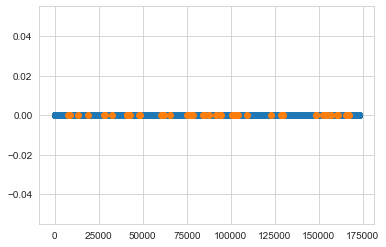

In [19]:
creditCard_genuine = FilteredData.loc[FilteredData["Class"] == 0]
creditCard_fraud = FilteredData.loc[FilteredData["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

#X-axis: Time

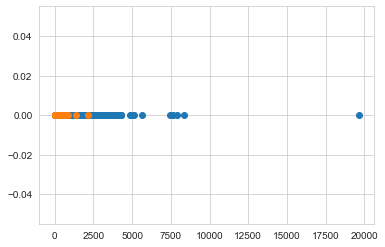

In [20]:
plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()
#X-axis: Amount

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


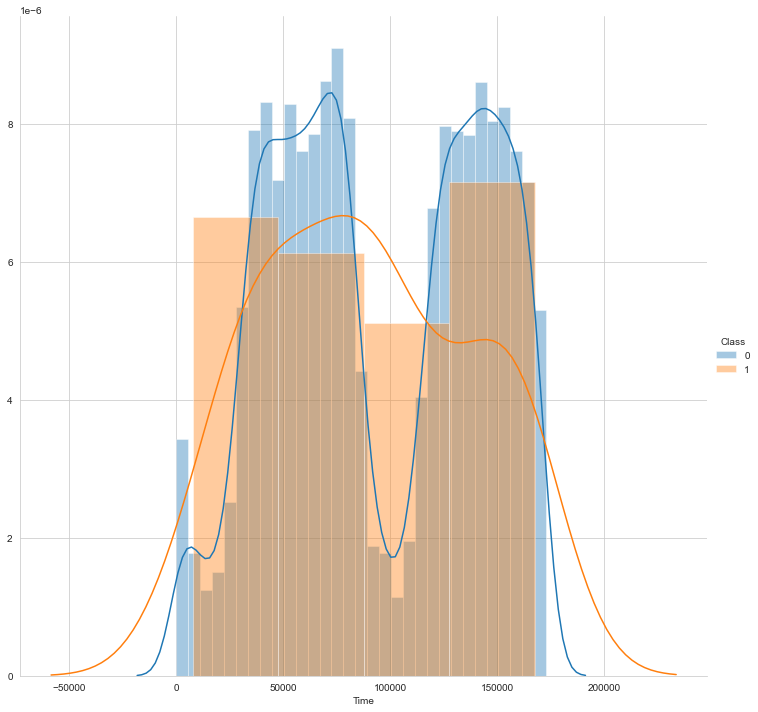

In [21]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Time").add_legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


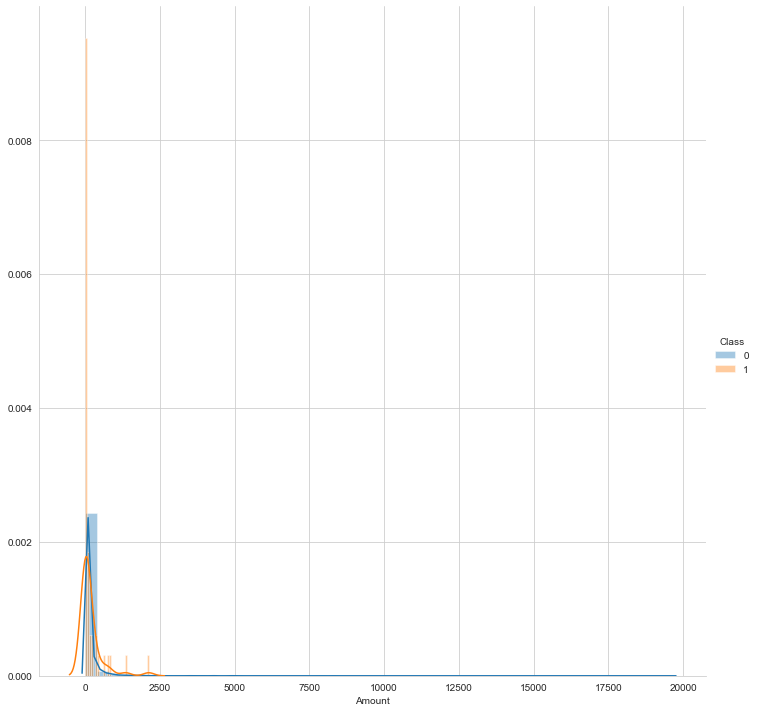

In [22]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Amount").add_legend()
plt.show()

pdf =  [9.97542221e-01 1.86088972e-03 4.21333521e-04 7.02222534e-05
 7.02222534e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.51111267e-05]


Counts = [5.07486429e-04 9.46703063e-07 2.14347863e-07 3.57246439e-08
 3.57246439e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.78623219e-08]


Bin edges =  [    0.     1965.653  3931.306  5896.959  7862.612  9828.265 11793.918
 13759.571 15725.224 17690.877 19656.53 ]


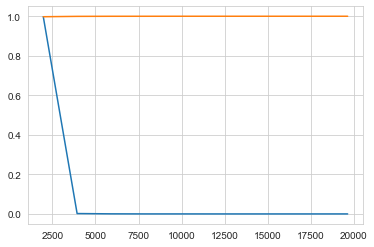

In [23]:
counts, bin_edges = np.histogram(FilteredData['Amount'], bins=10, density = True)
pdf = counts/(sum(counts))

print("pdf = ",pdf)
print("\n")
print("Counts =",counts)
print("\n")
print("Bin edges = ",bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

In [24]:
print("Means:")
print("Mean of transaction amount of genuine transactions: ",np.mean(creditCard_genuine["Amount"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(creditCard_fraud["Amount"]))

Means:
Mean of transaction amount of genuine transactions:  89.81389772087789
Mean of transaction amount of fraud transactions:  173.50530612244899


In [25]:
print("Standard Deviation:")
print("Std-Deviation of transaction amount of genuine transactions: ", np.std(creditCard_genuine["Amount"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(creditCard_fraud["Amount"]))

Standard Deviation:
Std-Deviation of transaction amount of genuine transactions:  270.63183451745994
Std-Deviation of transaction amount of fraud transactions:  384.0170113371735


In [26]:
print("Median:")
print("Median of transaction amount of genuine transactions: ", np.median(creditCard_genuine["Amount"]))
print("Median of transaction amount of fraud transactions: ", np.median(creditCard_fraud["Amount"]))

Median:
Median of transaction amount of genuine transactions:  22.380000000000003
Median of transaction amount of fraud transactions:  4.9


In [27]:
print("\nQuantiles:")
print(np.percentile(creditCard_genuine["Amount"],np.arange(0, 100, 25)))
print(np.percentile(creditCard_fraud["Amount"],np.arange(0, 100, 25)))


Quantiles:
[ 0.    5.99 22.38 78.82]
[  0.     1.     4.9  122.68]
